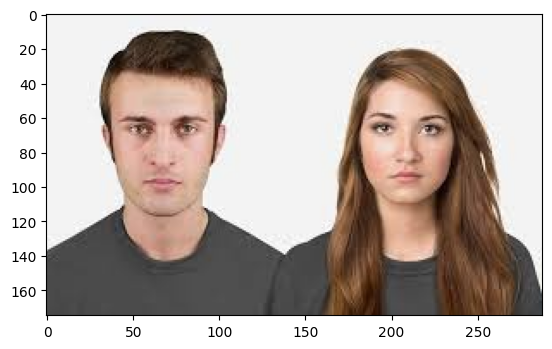

C:\Users\fathy\AppData\Local\Temp\ipykernel_14824\2925769133.py:34: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


1/1 [==============================] - 1s 693ms/step

Acral Lentiginous Melanoma: 4.62 %
Beaus Line: 0.31 %
Blue Finger: 0.03 %
Clubbing: 0.83 %
Healthy Nail: 6.56 %
Koilonychia: 3.32 %
Muehrckes Lines: 0.79 %
Pitting: 0.10 %
Terrys Nail: 0.40 %
Error-Not Nail: 83.04 %

** The most likely disease is Error-Not Nail with a probability of 83.04 %.


In [9]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the model
model = load_model("keras_model.h5", compile=False)
# Load the labels
class_names = ["Acral Lentiginous Melanoma", 
               "Beaus Line", 
               "Blue Finger", 
               "Clubbing", 
               "Healthy Nail", 
               "Koilonychia", 
               "Muehrckes Lines",  
               "Pitting", 
               "Terrys Nail",
               "Error-Not Nail"]

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("images.jpeg").convert("RGB")

plt.imshow(image)
plt.show();

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predict the class probabilities
predictions = model.predict(data)[0]
print("")

# Find the index of the class with the highest predicted probability
max_index = predictions.argmax()

# Get the name and percentage of the class with the highest predicted probability
max_class_name = class_names[max_index].strip()
max_probability = predictions[max_index]
max_percentage = max_probability * 100

# Output the probabilities of each class as a percentage
for i in range(len(class_names)):
    class_name = class_names[i].strip()
    probability = predictions[i]
    percentage = probability * 100
    print(f"{class_name}: {percentage:.2f} %")


# Output the name and percentage of the class with the highest predicted probability
print(f"\n** The most likely disease is {max_class_name} with a probability of {max_percentage:.2f} %.")
if max_class_name == "Healthy Nail":
    print("** Possible diseases for the symtoms is: NONE")
elif max_class_name == "Blue Finger":
    print("** Possible diseases are Asthma, Heart disease, Methhemoglobinemia, Polycythemia, Raynauds disease ")
    print("** I suggest that you go to a doctor specializing in 'cardiology and vascular.'")
elif max_class_name == "Beaus Line":
    print("** Possible diseases are zinc deficiency, pneumonia ")
    print("** I suggest that you go to a doctor specializing in 'Dermatologist'.")
elif max_class_name == "Clubbing":
    print("** Possible diseases are Lung cancer, Lung abscess, Pulmonary tuberculosis, Congestive cardiac failure, Infective endocarditis")
    print("** I suggest that you go to a doctor specializing in ' lungs (pulmonology)'.")
elif max_class_name == "Koilonychia":
    print("** Possible diseases are iron deficiency anemia")
    print("** I suggest that you go to a doctor specializing in 'autoimmune diseases'.")
elif max_class_name == "Muehrckes Lines":
    print("** Possible diseases are arsenic poisoning, thallium poisoning, hodgkins lymphoma, sickle cell, anemia cardiac failure")
    print("** I suggest that you go to a doctor specializing in 'Dermatologist'.")
elif max_class_name == "Pittingkeras":
    print("** Possible diseases are Psoriasis , Rheumatoid arthritis , Eczema , Alopecia areata , Systemic lupus erythematosus , Raynaud's disease , Scleroderma")
    print("** I suggest that you go to a doctor specializing in 'Dermatologist'.")
elif max_class_name == "Terrys Nail":
    print("** Possible diseases are Liver disease , Kidney disease , Congestive heart failure , Diabetes")
    print("** I suggest that you go to a doctor specializing in 'endocrinologist, nutritionist or hepatologist'.")
elif max_class_name == "Acral Lentiginous Melanoma":
    print("** Possible diseases are Subungual hematoma , Subungual melanonychia , Warts , Onychomycosis")
    print("** I suggest that you go to a doctor specializing in 'Dermatologist'.")
